# Analysis 
The code in this file is for analysis and visualization of the data collected in the pageview.ipynb file. The code in this file seeks to do the following:

> __Maximum Average and Minimum Average__ - The first graph should contain time series for the articles that have the highest average monthly page requests and the lowest average monthly page requests for desktop access and mobile access. Your graph should have four lines (max desktop, min desktop, max mobile, min mobile).

> __Top 10 Peak Page Views__ - The second graph should contain time series for the top 10 article pages by largest (peak) page views over the entire time by access type. You first find the month for each article that contains the highest (peak) page views, and then order the articles by these peak values. Your graph should contain the top 10 for desktop and top 10 for mobile access (20 lines).

> __Fewest Months of Data__ - The third graph should show pages that have the fewest months of available data. These will all be relatively short time series and should contain a set of the most recent academy award winners. Your graph should show the 10 articles with the 

### Loading Data
The following cell loads the necessary data for the visualizations.

In [6]:
# Read data into objects
import pandas as pd
import matplotlib.pyplot as plt

# Change these to appropriate files if necessary.
desktop_file = 'academy_monthly_desktop_201507-202309.json'
mobile_file = 'academy_monthly_mobile_201507-202309.json'

df_desktop = pd.read_json(desktop_file, lines=True)
df_mobile = pd.read_json(mobile_file, lines=True)
df_desktop.head()

,project,article,granularity,timestamp,agent,views
0,en.wikipedia,Everything_Everywhere_All_at_Once,monthly,2020-01-01,user,1209
1,en.wikipedia,Everything_Everywhere_All_at_Once,monthly,2020-02-01,user,2944
2,en.wikipedia,Everything_Everywhere_All_at_Once,monthly,2020-03-01,user,2612
3,en.wikipedia,Everything_Everywhere_All_at_Once,monthly,2020-04-01,user,4530
4,en.wikipedia,Everything_Everywhere_All_at_Once,monthly,2020-05-01,user,3952


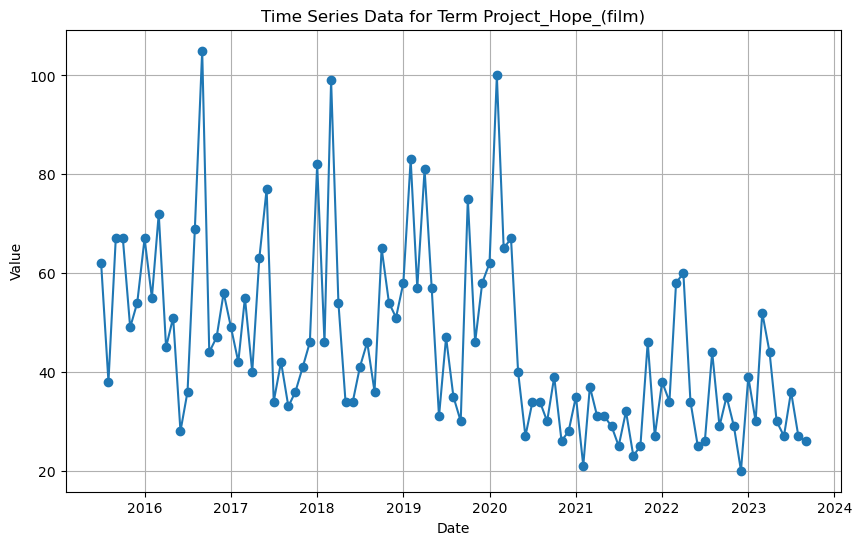

In [7]:
# Group the DataFrame by 'Term' and calculate the average for each group
grouped = df_mobile.groupby('article')['views'].mean()

# Find the group with the highest average
highest_avg_term = grouped.idxmin()

# Filter the DataFrame to get data for the term with the highest average
highest_avg_data = df_mobile[df_mobile['article'] == highest_avg_term]

# Plot the time series data for the term with the highest average
plt.figure(figsize=(10, 6))
plt.plot(highest_avg_data['timestamp'], highest_avg_data['views'], marker='o')
plt.title(f'Time Series Data for Term {highest_avg_term}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

The following cell aims to do the following task:
> __Maximum Average and Minimum Average__ - The first graph should contain time series for the articles that have the highest average monthly page requests and the lowest average monthly page requests for desktop access and mobile access. Your graph should have four lines (max desktop, min desktop, max mobile, min mobile).

For visualization purposes, I made the y-axis for views log-scale

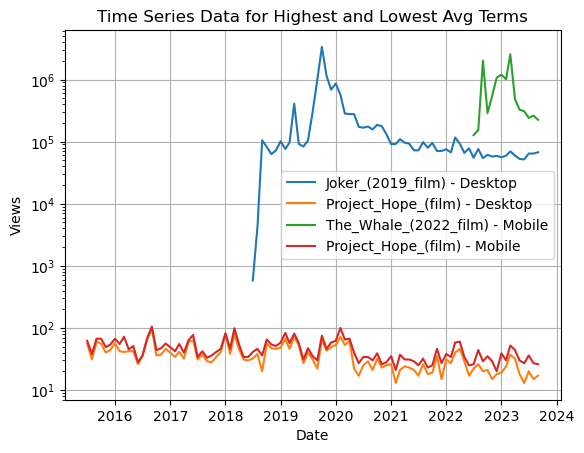

In [5]:
# Group by 'Term' and calculate the average for each group in both DataFrames
avg1 = df_desktop.groupby('article')['views'].mean()
avg2 = df_mobile.groupby('article')['views'].mean()

# Find the terms with the highest and lowest average in each DataFrame
highest_avg_term_1 = avg1.idxmax()
lowest_avg_term_1 = avg1.idxmin()

highest_avg_term_2 = avg2.idxmax()
lowest_avg_term_2 = avg2.idxmin()

# Filter the DataFrames to get data for the terms with the highest and lowest average
highest_avg_data_1 = df_desktop[df_desktop['article'] == highest_avg_term_1]
lowest_avg_data_1 = df_desktop[df_desktop['article'] == lowest_avg_term_1]

highest_avg_data_2 = df_mobile[df_mobile['article'] == highest_avg_term_2]
lowest_avg_data_2 = df_mobile[df_mobile['article'] == lowest_avg_term_2]

# Plot the time series data for the terms on the same graph
# plt.figure(figsize=(10, 6))
plt.plot(highest_avg_data_1['timestamp'], highest_avg_data_1['views'], label=f'{highest_avg_term_1} - Desktop')
plt.plot(lowest_avg_data_1['timestamp'], lowest_avg_data_1['views'], label=f'{lowest_avg_term_1} - Desktop')
plt.plot(highest_avg_data_2['timestamp'], highest_avg_data_2['views'], label=f'{highest_avg_term_2} - Mobile')
plt.plot(lowest_avg_data_2['timestamp'], lowest_avg_data_2['views'], label=f'{lowest_avg_term_2} - Mobile')

plt.title('Time Series Data for Highest and Lowest Avg Terms')
plt.xlabel('Date')
plt.ylabel('Log(Views)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

The following cell seeks to do the following:

> __Top 10 Peak Page Views__ - The second graph should contain time series for the top 10 article pages by largest (peak) page views over the entire time by access type. You first find the month for each article that contains the highest (peak) page views, and then order the articles by these peak values. Your graph should contain the top 10 for desktop and top 10 for mobile access (20 lines).


1917_(2019_film)
Avatar:_The_Way_of_Water
Black_Panther_(film)
Blade_Runner_2049
Dune_(2021_film)
Joker_(2019_film)
Parasite_(2019_film)
Spectre_(2015_film)
Tenet_(film)
The_Revenant_(2015_film)


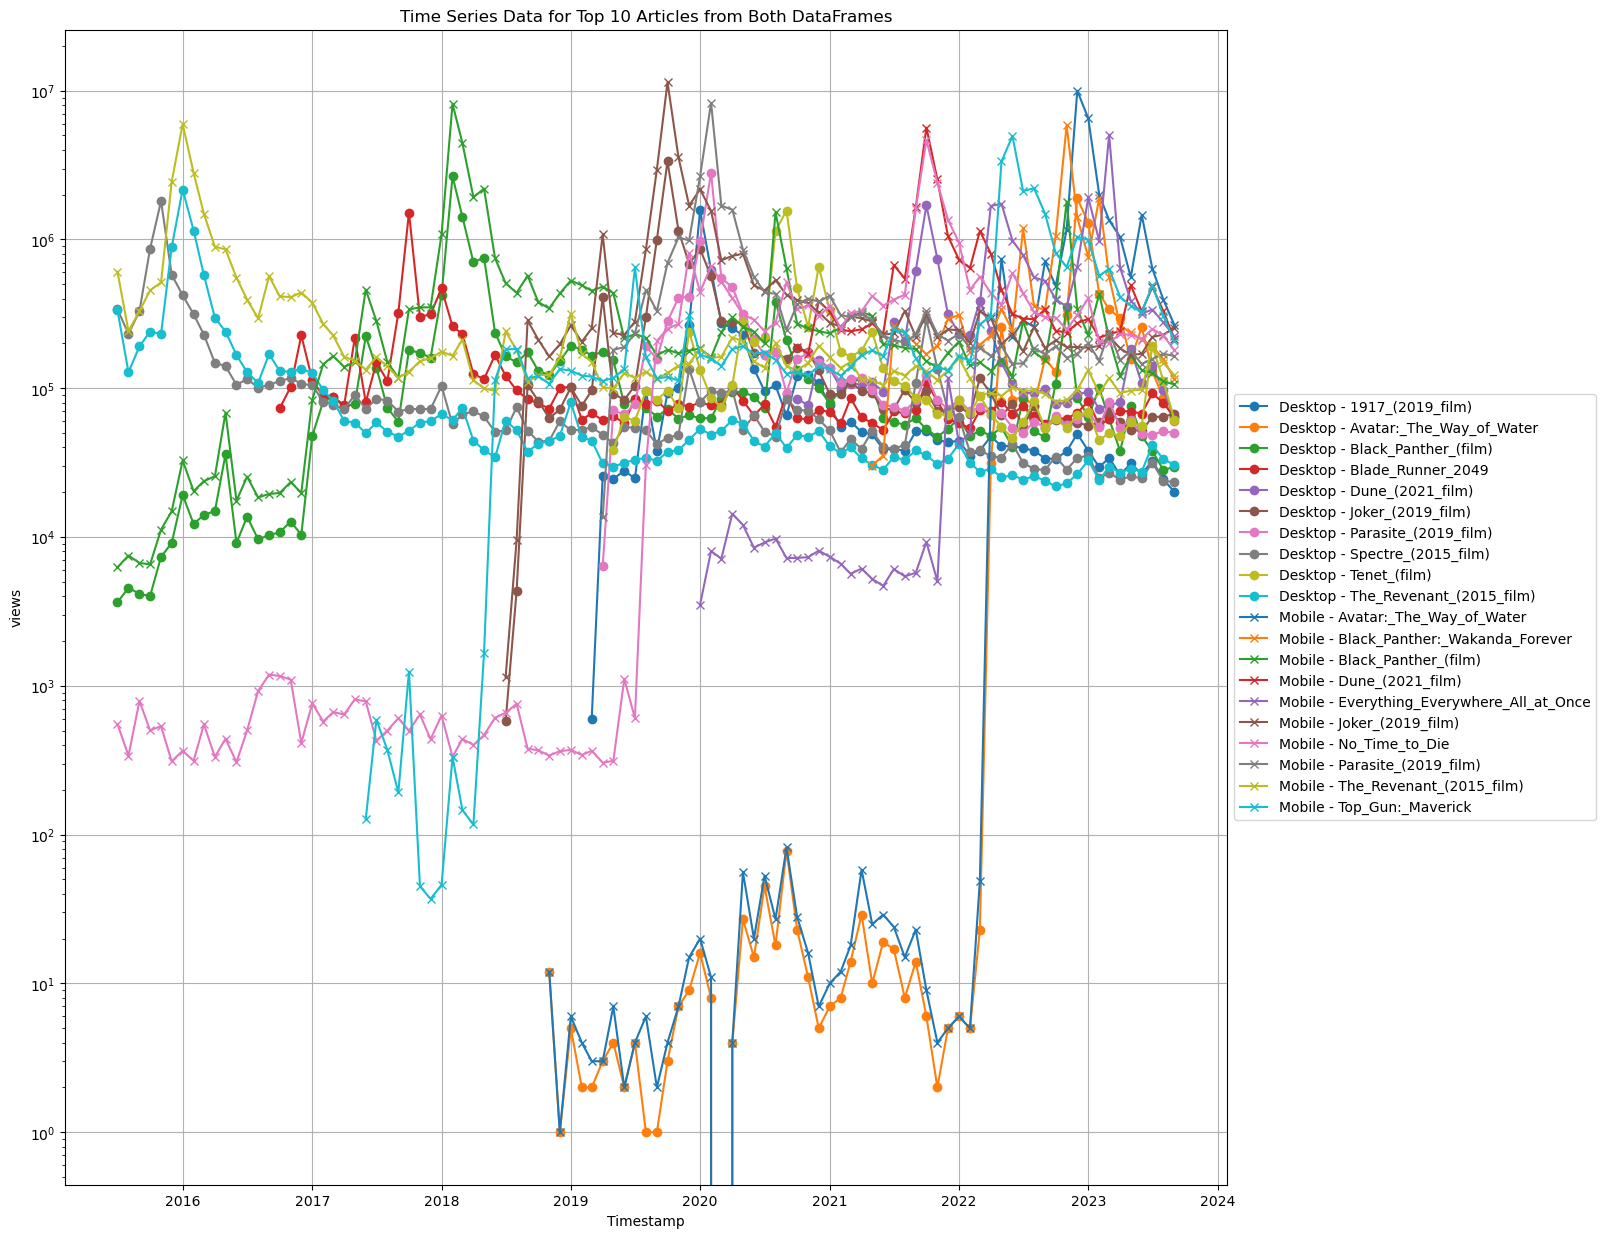

In [9]:
top_10_articles_desk = df_desktop.groupby('article')['views'].max().nlargest(10).index
top_10_articles_mobile = df_mobile.groupby('article')['views'].max().nlargest(10).index

# Filter the DataFrames to get data for the top 10 articles with the highest max value
filtered_df1 = df_desktop[df_desktop['article'].isin(top_10_articles_desk)]
filtered_df2 = df_mobile[df_mobile['article'].isin(top_10_articles_mobile)]

# Concatenate the two DataFrames
combined_df = pd.concat([filtered_df1, filtered_df2])


# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the time series data for the top 10 articles from both DataFrames
for article, group in filtered_df1.groupby('article'):
    print(article)
    ax.plot(group['timestamp'], group['views'], label=f'Desktop - {article}', marker='o')

for article, group in filtered_df2.groupby('article'):
    ax.plot(group['timestamp'], group['views'], label=f'Mobile - {article}', marker='x')

ax.set_title('Time Series Data for Top 10 Articles from Both DataFrames')
ax.set_xlabel('Timestamp')
ax.set_ylabel('views')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_yscale('log')
ax.grid(True)
plt.show()

The following cell seeks to do the following:

> __Fewest Months of Data__ - The third graph should show pages that have the fewest months of available data. These will all be relatively short time series and should contain a set of the most recent academy award winners. Your graph should show the 10 articles with the 


In [ ]:
# TODO